In [1]:
## R code 11.1
library(rethinking)
data(Trolley)
d <- Trolley

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


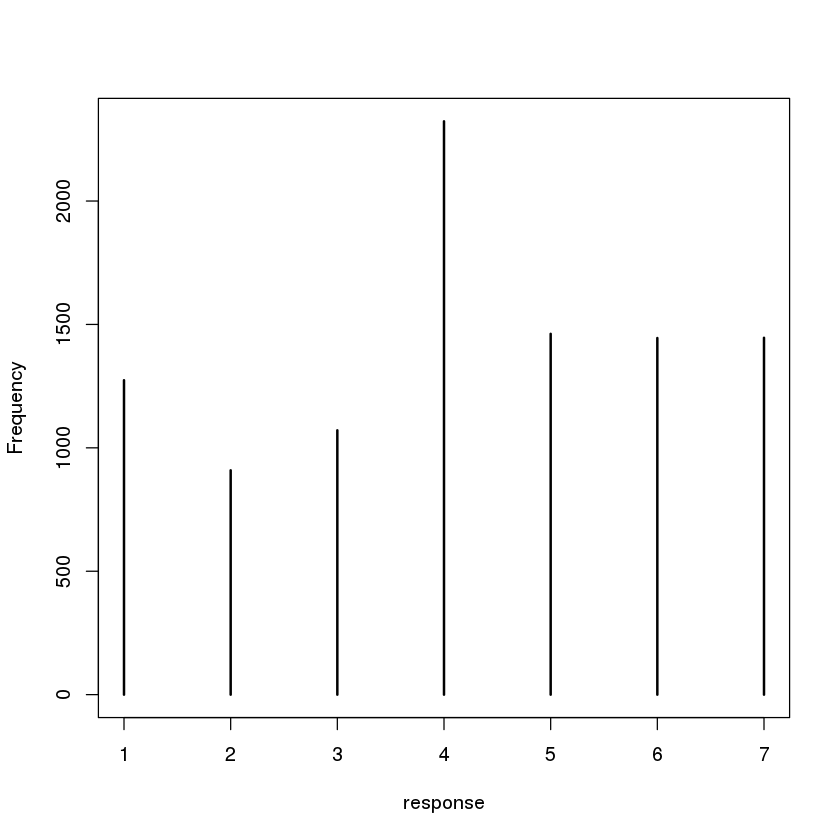

In [2]:
## R code 11.2
simplehist( d$response , xlim=c(1,7) , xlab="response" )

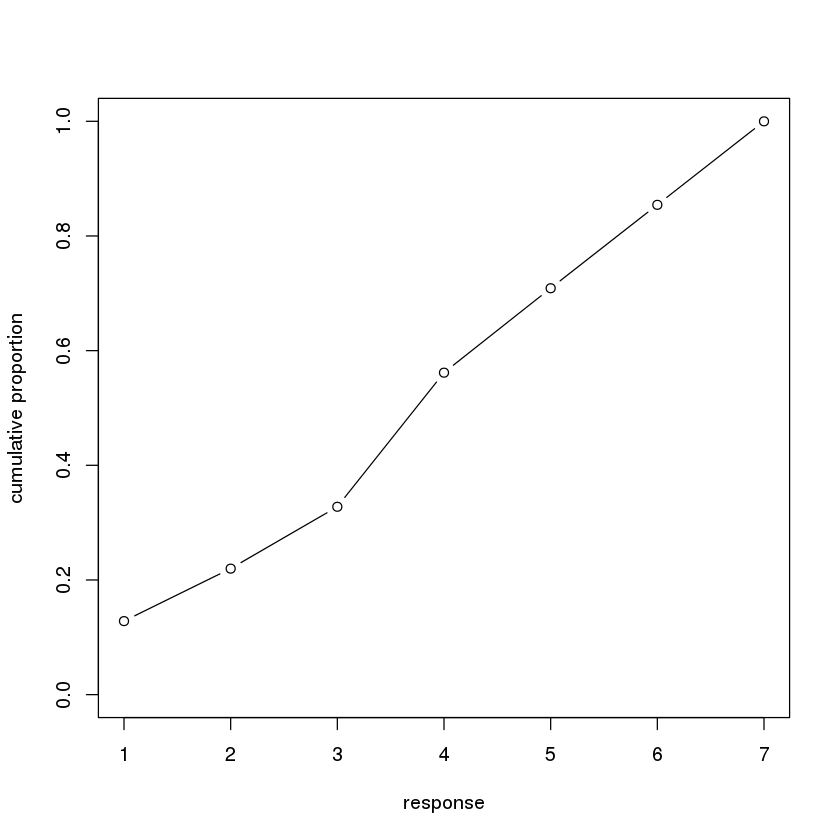

In [3]:
## R code 11.3
# discrete proportion of each response value
pr_k <- table( d$response ) / nrow(d)

# cumsum converts to cumulative proportions
cum_pr_k <- cumsum( pr_k )

# plot
plot( 1:7 , cum_pr_k , type="b" , xlab="response" ,
ylab="cumulative proportion" , ylim=c(0,1) )

In [4]:
## R code 11.4
logit <- function(x) log(x/(1-x)) # convenience function
( lco <- logit( cum_pr_k ) )

1          2          3          4          5          6          7 
-1.9160912 -1.2666056 -0.7186340  0.2477857  0.8898637  1.7693809        Inf

In [5]:
## R code 11.5
m11.1 <- map(
    alist(
        response ~ dordlogit( phi , c(a1,a2,a3,a4,a5,a6) ),
        phi <- 0,
        c(a1,a2,a3,a4,a5,a6) ~ dnorm(0,10)
    ) ,
    data=d ,
    start=list(a1=-2,a2=-1,a3=0,a4=1,a5=2,a6=2.5) )

In [6]:
## R code 11.6
precis(m11.1)

    Mean StdDev  5.5% 94.5%
a1 -1.92   0.03 -1.96 -1.87
a2 -1.27   0.02 -1.31 -1.23
a3 -0.72   0.02 -0.75 -0.68
a4  0.25   0.02  0.22  0.28
a5  0.89   0.02  0.85  0.93
a6  1.77   0.03  1.72  1.81

In [7]:
## R code 11.7
logistic(coef(m11.1))

a1        a2        a3        a4        a5        a6 
0.1283005 0.2198398 0.3276948 0.5616311 0.7088609 0.8543786

In [8]:
## R code 11.8
# note that data with name 'case' not allowed in Stan
# so will pass pruned data list
m11.1stan <- map2stan(
    alist(
        response ~ dordlogit( phi , cutpoints ),
        phi <- 0,
        cutpoints ~ dnorm(0,10)
    ) ,
    data=list(response=d$response),
    start=list(cutpoints=c(-2,-1,0,1,2,2.5)) ,
    chains=2 , cores=2 )

# need depth=2 to show vector of parameters
precis(m11.1stan,depth=2)


SAMPLING FOR MODEL 'response ~ dordlogit(phi, cutpoints)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.036157 seconds (Sampling)
#                0.03616 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 2000 / 2000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

              Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
cutpoints[1] -1.92   0.03      -1.97      -1.87  1199    1
cutpoints[2] -1.27   0.02      -1.31      -1.23  1631    1
cutpoints[3] -0.72   0.02      -0.75      -0.68  1692    1
cutpoints[4]  0.25   0.02       0.22       0.28  2000    1
cutpoints[5]  0.89   0.02       0.86       0.92  2000    1
cutpoints[6]  1.77   0.03       1.72       1.81  2000    1

In [9]:
## R code 11.9
( pk <- dordlogit( 1:7 , 0 , coef(m11.1) ) )

[1] 0.12830051 0.09153931 0.10785502 0.23393627 0.14722982 0.14551766 0.14562142

In [10]:
## R code 11.10
sum( pk*(1:7) )

[1] 4.199294

In [11]:
## R code 11.11
( pk <- dordlogit( 1:7 , 0 , coef(m11.1)-0.5 ) )

[1] 0.08195550 0.06401015 0.08221206 0.20910054 0.15897033 0.18438530 0.21936612

In [12]:
## R code 11.12
sum( pk*(1:7) )

[1] 4.72974

In [13]:
## R code 11.13
m11.2 <- map(
    alist(
        response ~ dordlogit( phi , c(a1,a2,a3,a4,a5,a6) ) ,
        phi <- bA*action + bI*intention + bC*contact,
        c(bA,bI,bC) ~ dnorm(0,10),
        c(a1,a2,a3,a4,a5,a6) ~ dnorm(0,10)
    ) ,
    data=d ,
    start=list(a1=-1.9,a2=-1.2,a3=-0.7,a4=0.2,a5=0.9,a6=1.8) )

In [14]:
## R code 11.14
m11.3 <- map(
    alist(
        response ~ dordlogit( phi , c(a1,a2,a3,a4,a5,a6) ) ,
        phi <- bA*action + bI*intention + bC*contact +
            bAI*action*intention + bCI*contact*intention ,
        c(bA,bI,bC,bAI,bCI) ~ dnorm(0,10),
        c(a1,a2,a3,a4,a5,a6) ~ dnorm(0,10)
    ) ,
    data=d ,
    start=list(a1=-1.9,a2=-1.2,a3=-0.7,a4=0.2,a5=0.9,a6=1.8) )

In [15]:
## R code 11.15
coeftab(m11.1,m11.2,m11.3)

     m11.1   m11.2   m11.3  
a1     -1.92   -2.84   -2.63
a2     -1.27   -2.16   -1.94
a3     -0.72   -1.57   -1.34
a4      0.25   -0.55   -0.31
a5      0.89    0.12    0.36
a6      1.77    1.02    1.27
bA        NA   -0.71   -0.47
bI        NA   -0.72   -0.28
bC        NA   -0.96   -0.33
bAI       NA      NA   -0.45
bCI       NA      NA   -1.27
nobs    9930    9930    9930

In [16]:
## R code 11.16
compare( m11.1 , m11.2 , m11.3 , refresh=0.1 )

Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


Constructing posterior predictions


[ 1000 / 1000 ]


         WAIC pWAIC dWAIC weight    SE   dSE
m11.3 36929.4  11.1   0.0      1 81.34    NA
m11.2 37090.2   9.2 160.9      0 76.21 25.73
m11.1 37854.7   6.1 925.4      0 57.52 62.66

In [34]:
## R code 11.17
post <- extract.samples( m11.3 )

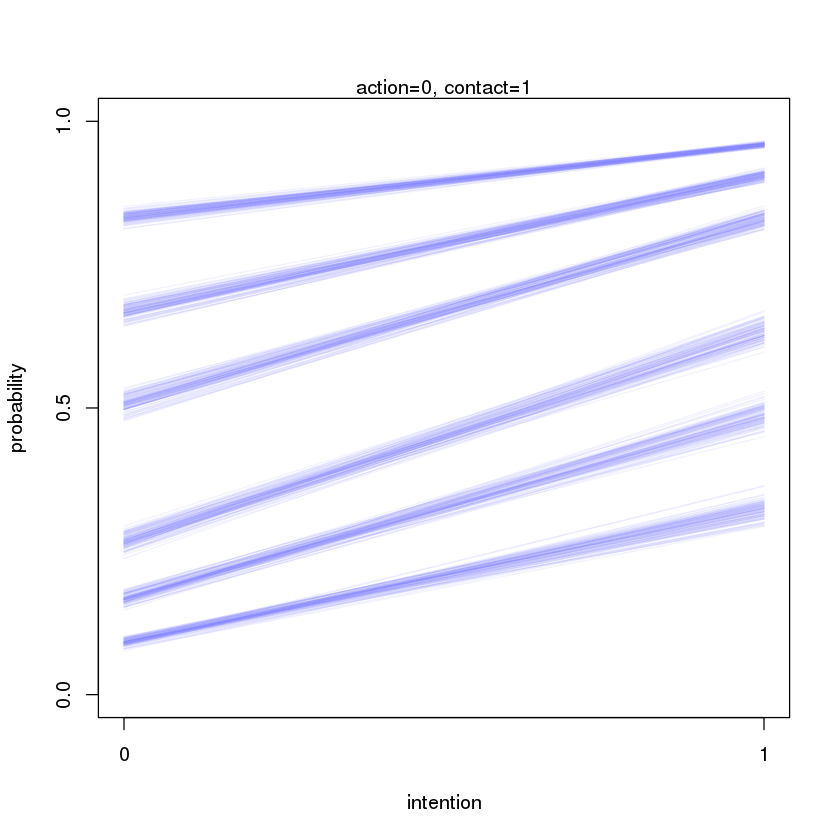

In [35]:
## R code 11.18
plot( 1 , 1 , type="n" , xlab="intention" , ylab="probability" ,
    xlim=c(0,1) , ylim=c(0,1) , xaxp=c(0,1,1) , yaxp=c(0,1,2) )

## R code 11.19
kA <- 0     # value for action
kC <- 1     # value for contact
kI <- 0:1   # values of intention to calculate over
for ( s in 1:100 ) {
    p <- post[s,]
    ak <- as.numeric(p[1:6])
    phi <- p$bA*kA + p$bI*kI + p$bC*kC +
        p$bAI*kA*kI + p$bCI*kC*kI
    pk <- pordlogit( 1:6 , a=ak , phi=phi )
    for ( i in 1:6 )
        lines( kI , pk[,i] , col=col.alpha(rangi2,0.1) )
}
mtext( concat( "action=",kA,", contact=",kC ) )

In [36]:
## R code 11.20
# define parameters
prob_drink <- 0.2 # 20% of days
rate_work <- 1    # average 1 manuscript per day

# sample one year of production
N <- 365

# simulate days monks drink
drink <- rbinom( N , 1 , prob_drink )

# simulate manuscripts completed
y <- (1-drink)*rpois( N , rate_work )

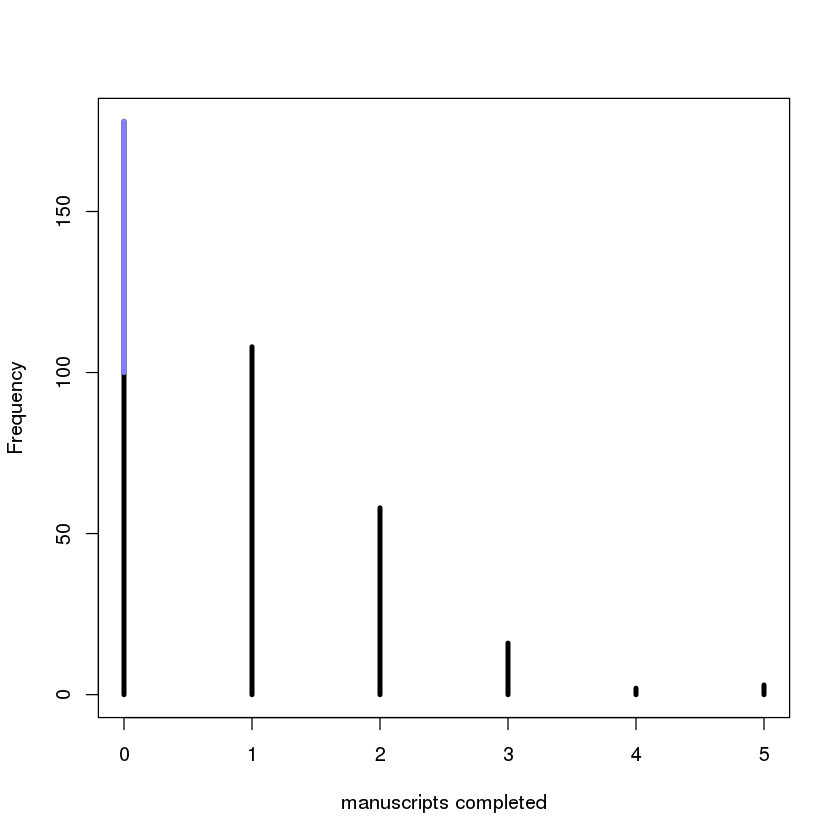

In [37]:
## R code 11.21
simplehist( y , xlab="manuscripts completed" , lwd=4 )
zeros_drink <- sum(drink)
zeros_work <- sum(y==0 & drink==0)
zeros_total <- sum(y==0)
lines( c(0,0) , c(zeros_work,zeros_total) , lwd=4 , col=rangi2 )

In [22]:
## R code 11.22
m11.4 <- map(
    alist(
        y ~ dzipois( p , lambda ),
        logit(p) <- ap,
        log(lambda) <- al,
        ap ~ dnorm(0,1),
        al ~ dnorm(0,10)
    ) ,
    data=list(y=y) )
precis(m11.4)

    Mean StdDev  5.5% 94.5%
ap -1.38   0.33 -1.90 -0.86
al -0.01   0.08 -0.14  0.13

In [23]:
## R code 11.23
logistic(-1.39) # probability drink
exp(0.05)       # rate finish manuscripts, when not drinking

[1] 0.1994078

[1] 1.051271

In [24]:
## R code 11.24
dzip <- function( x , p , lambda , log=TRUE ) {
    ll <- ifelse(
        x==0 ,
        p + (1-p)*exp(-lambda) ,
        (1-p)*dpois(x,lambda,FALSE)
    )
    if ( log==TRUE ) ll <- log(ll)
    return(ll)
}

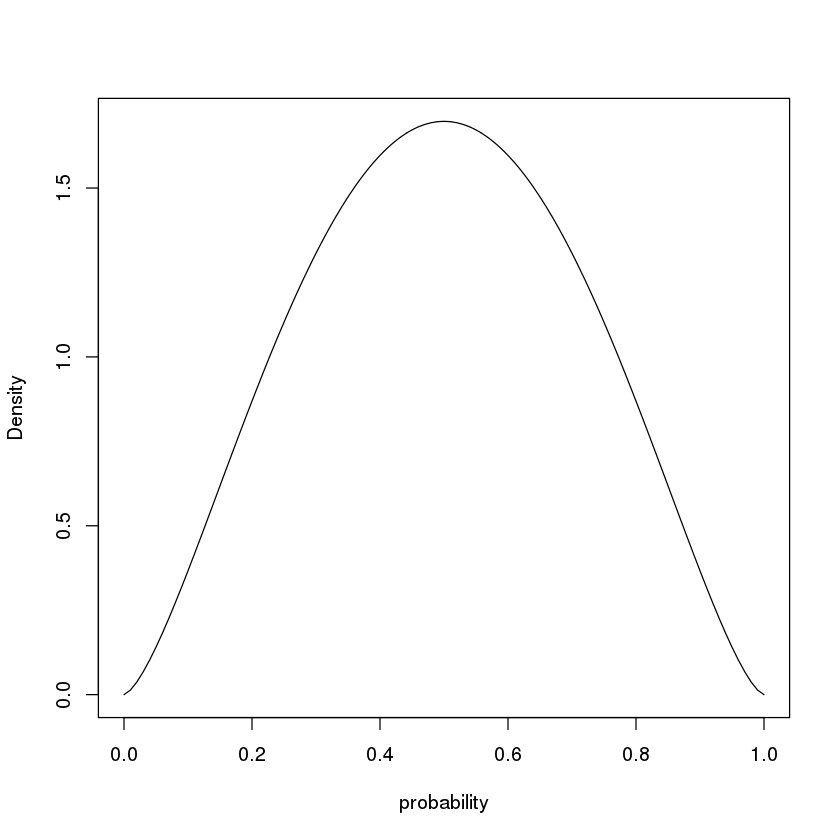

In [25]:
## R code 11.25
pbar <- 0.5
theta <- 5
curve( dbeta2(x,pbar,theta) , from=0 , to=1 ,
    xlab="probability" , ylab="Density" )

In [26]:
## R code 11.26
library(rethinking)
data(UCBadmit)
d <- UCBadmit
m11.5 <- map2stan(
    alist(
        admit ~ dbetabinom(applications,pbar,theta),
        logit(pbar) <- a,
        a ~ dnorm(0,2),
        theta ~ dexp(1)
    ),
    data=d,
    constraints=list(theta="lower=0"),
    start=list(theta=3),
    iter=4000 , warmup=1000 , chains=2 , cores=2 )

Will attempt to remove dots internally.
Warning message:
In FUN(X[[i]], ...): data with name dept is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name applicant_gender is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name dept is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name applicant_gender is not numeric and not used


SAMPLING FOR MODEL 'admit ~ dbetabinom(applications, pbar, theta)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 2e-06 seconds (Warm-up)
#                0.000248 seconds (Sampling)
#                0.00025 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 6000 / 6000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

In [27]:
## R code 11.27
precis(m11.5)

Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

       Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
theta  2.59   0.89       1.23       3.94  2442    1
a     -0.38   0.32      -0.87       0.15  2462    1

In [28]:
## R code 11.28
post <- extract.samples(m11.5)
quantile( logistic(post$a) , c(0.025,0.5,0.975) )

2.5%       50%     97.5% 
0.2677227 0.4035413 0.5647382

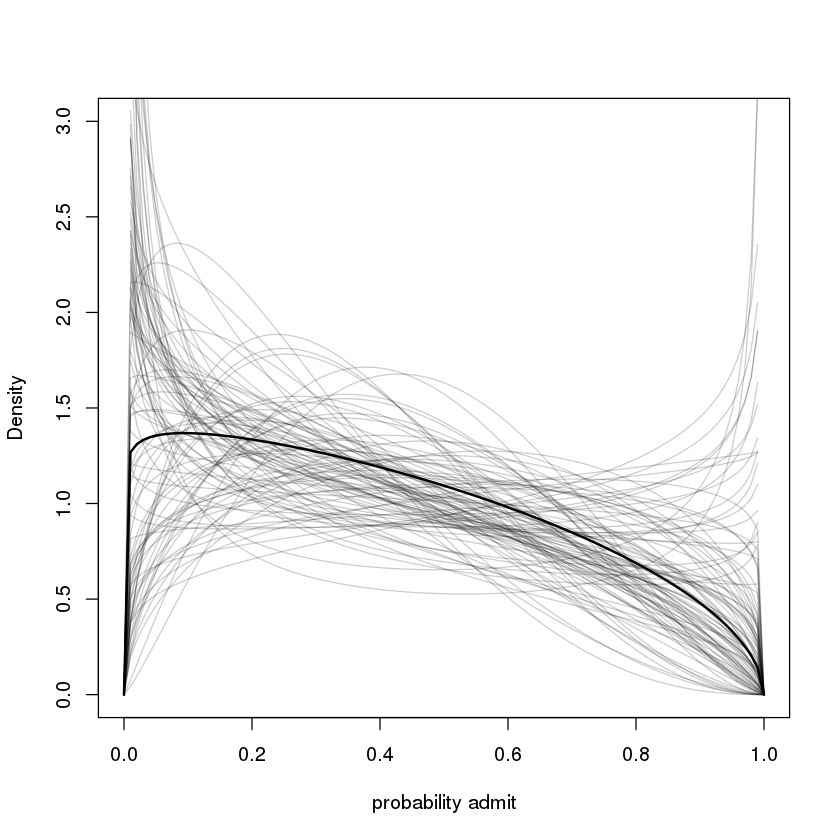

In [29]:
## R code 11.29
post <- extract.samples(m11.5)

# draw posterior mean beta distribution
curve( dbeta2(x,mean(logistic(post$a)),mean(post$theta)) , from=0 , to=1 ,
    ylab="Density" , xlab="probability admit", ylim=c(0,3) , lwd=2 )

# draw 100 beta distributions sampled from posterior
for ( i in 1:100 ) {
    p <- logistic( post$a[i] )
    theta <- post$theta[i]
    curve( dbeta2(x,p,theta) , add=TRUE , col=col.alpha("black",0.2) )
}

[ 1000 / 1000 ]
[ 1000 / 1000 ]


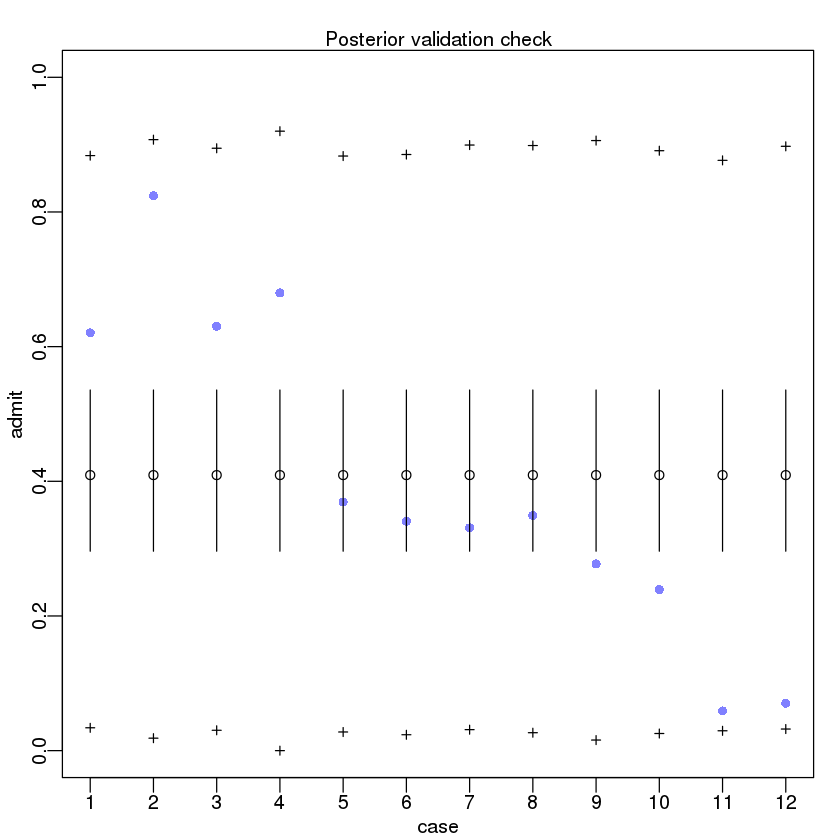

In [30]:
## R code 11.30
postcheck(m11.5)

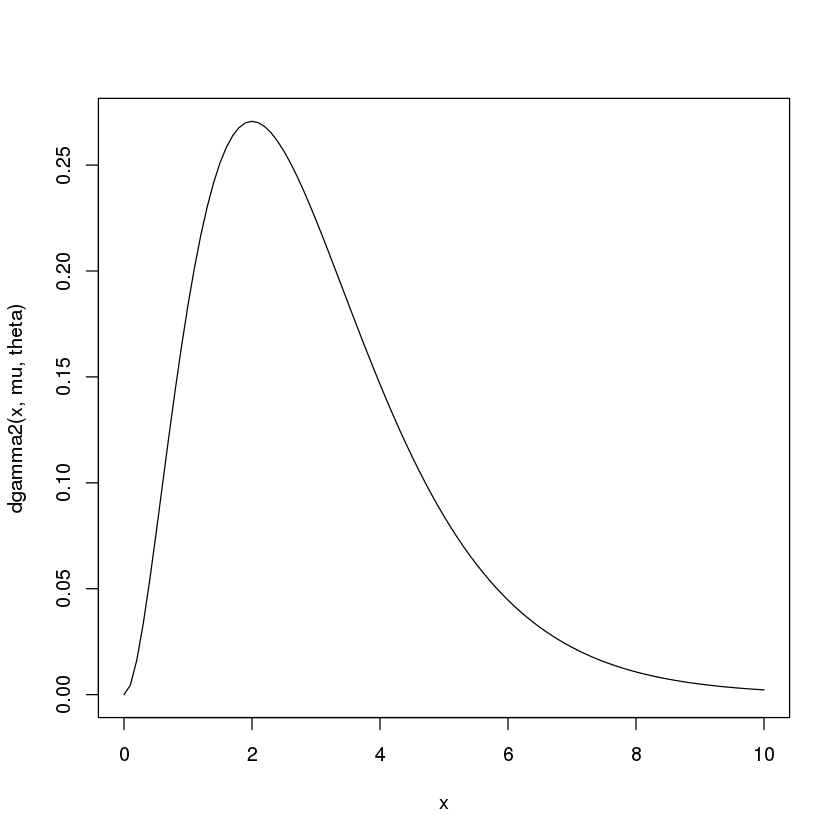

In [31]:
## R code 11.31
mu <- 3
theta <- 1
curve( dgamma2(x,mu,theta) , from=0 , to=10 )

In [32]:
## R code 11.32
library(rethinking)
data(Hurricanes)